# Data analysis
## Developed by *Kaustubh Joshi*

The data used in this notebook is taken from Kaggle. It is HR department data listing employee satisfaction level, evaluation result, number of years worked, monthy working hours etc.. Using this dataset we will create some interesting factfinding and prediction model. Let start !

## Basic to do list -  These questions are necesssary to get one started on right path

Did you specify the type of data analytic question (e.g. exploration, association causality) before touching the data?
    1. How satisfaction level is influenced by the other factors
    2. Department wise analysis of satisfaction levels
    3. How salary levels are influeced
    4. Create a model predicting if employee will leave the company
    
Did you define the metric for success before beginning?
    1. Logical reasoning shall match
    2. Logical reasoning shall match
    3. Logical reasoning shall match
    4. 90% accuracy
    
Did you understand the context for the question and the scientific or business application?
    
    The HR department has provided us the employee data and has asked us to provide interesting insights into the data   
    especially regarding the employee leaving the company
    
Did you record the experimental design?
    
    Dataset is available
    
Did you consider whether the question could be answered with the available data?
    
    Dataset consists of the 15000 records. So question shall be answered failry well

## Lets start analysis

The dataset is a .csv file which will be read using panda library. Below section will check basic data validity

In [1]:
import pandas as pd

employee_data = pd.read_csv('D:\LocalHome\joshik\Downloads\HR_comma_sep.csv')
employee_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Below section will give data disctribution overview

In [2]:
employee_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


From above table data seems to be in good condition. The Record count is similar for all the columns. Also the max and min values seems plausible.

Let's change the "sales" column values from string to integer.

Below is loop up table
'sales': 1,'accounting': 2,'hr': 3,'technical': 4,'support': 5,'management': 6,'IT': 7,'product_mng': 8,
                            'marketing': 9,'RandD': 10
                            
Similarly, do it for 'salary column'.
Look up table - 'low': 1,'medium': 2,'high': 3

In [3]:
employee_data_copy = employee_data
print(employee_data_copy['salary'].unique())
employee_data_copy = employee_data_copy.replace({'sales': 1,'accounting': 2,'hr': 3,'technical': 4,'support': 5,'management': 6,'IT': 7,'product_mng': 8,
                            'marketing': 9,'RandD': 10}, regex=True)
employee_data_copy = employee_data_copy.replace({'low': 1,'medium': 2,'high': 3}, regex=True)

print(employee_data_copy['sales'].unique())
print(employee_data_copy['salary'].unique())
employee_data_copy.describe()

['low' 'medium' 'high']
[ 1  2  3  4  5  6  7  8  9 10]
[1 2 3]


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,4.339823,1.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,2.820837,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,4.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,7.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,10.000000,3.000000


From above table data looks in a good health. Below we plot pair plot , to get pictorial overview of the complete data. Pairplot shows histograms of the columns in diagonal of the matrix and pairwise scatter plot of the data.

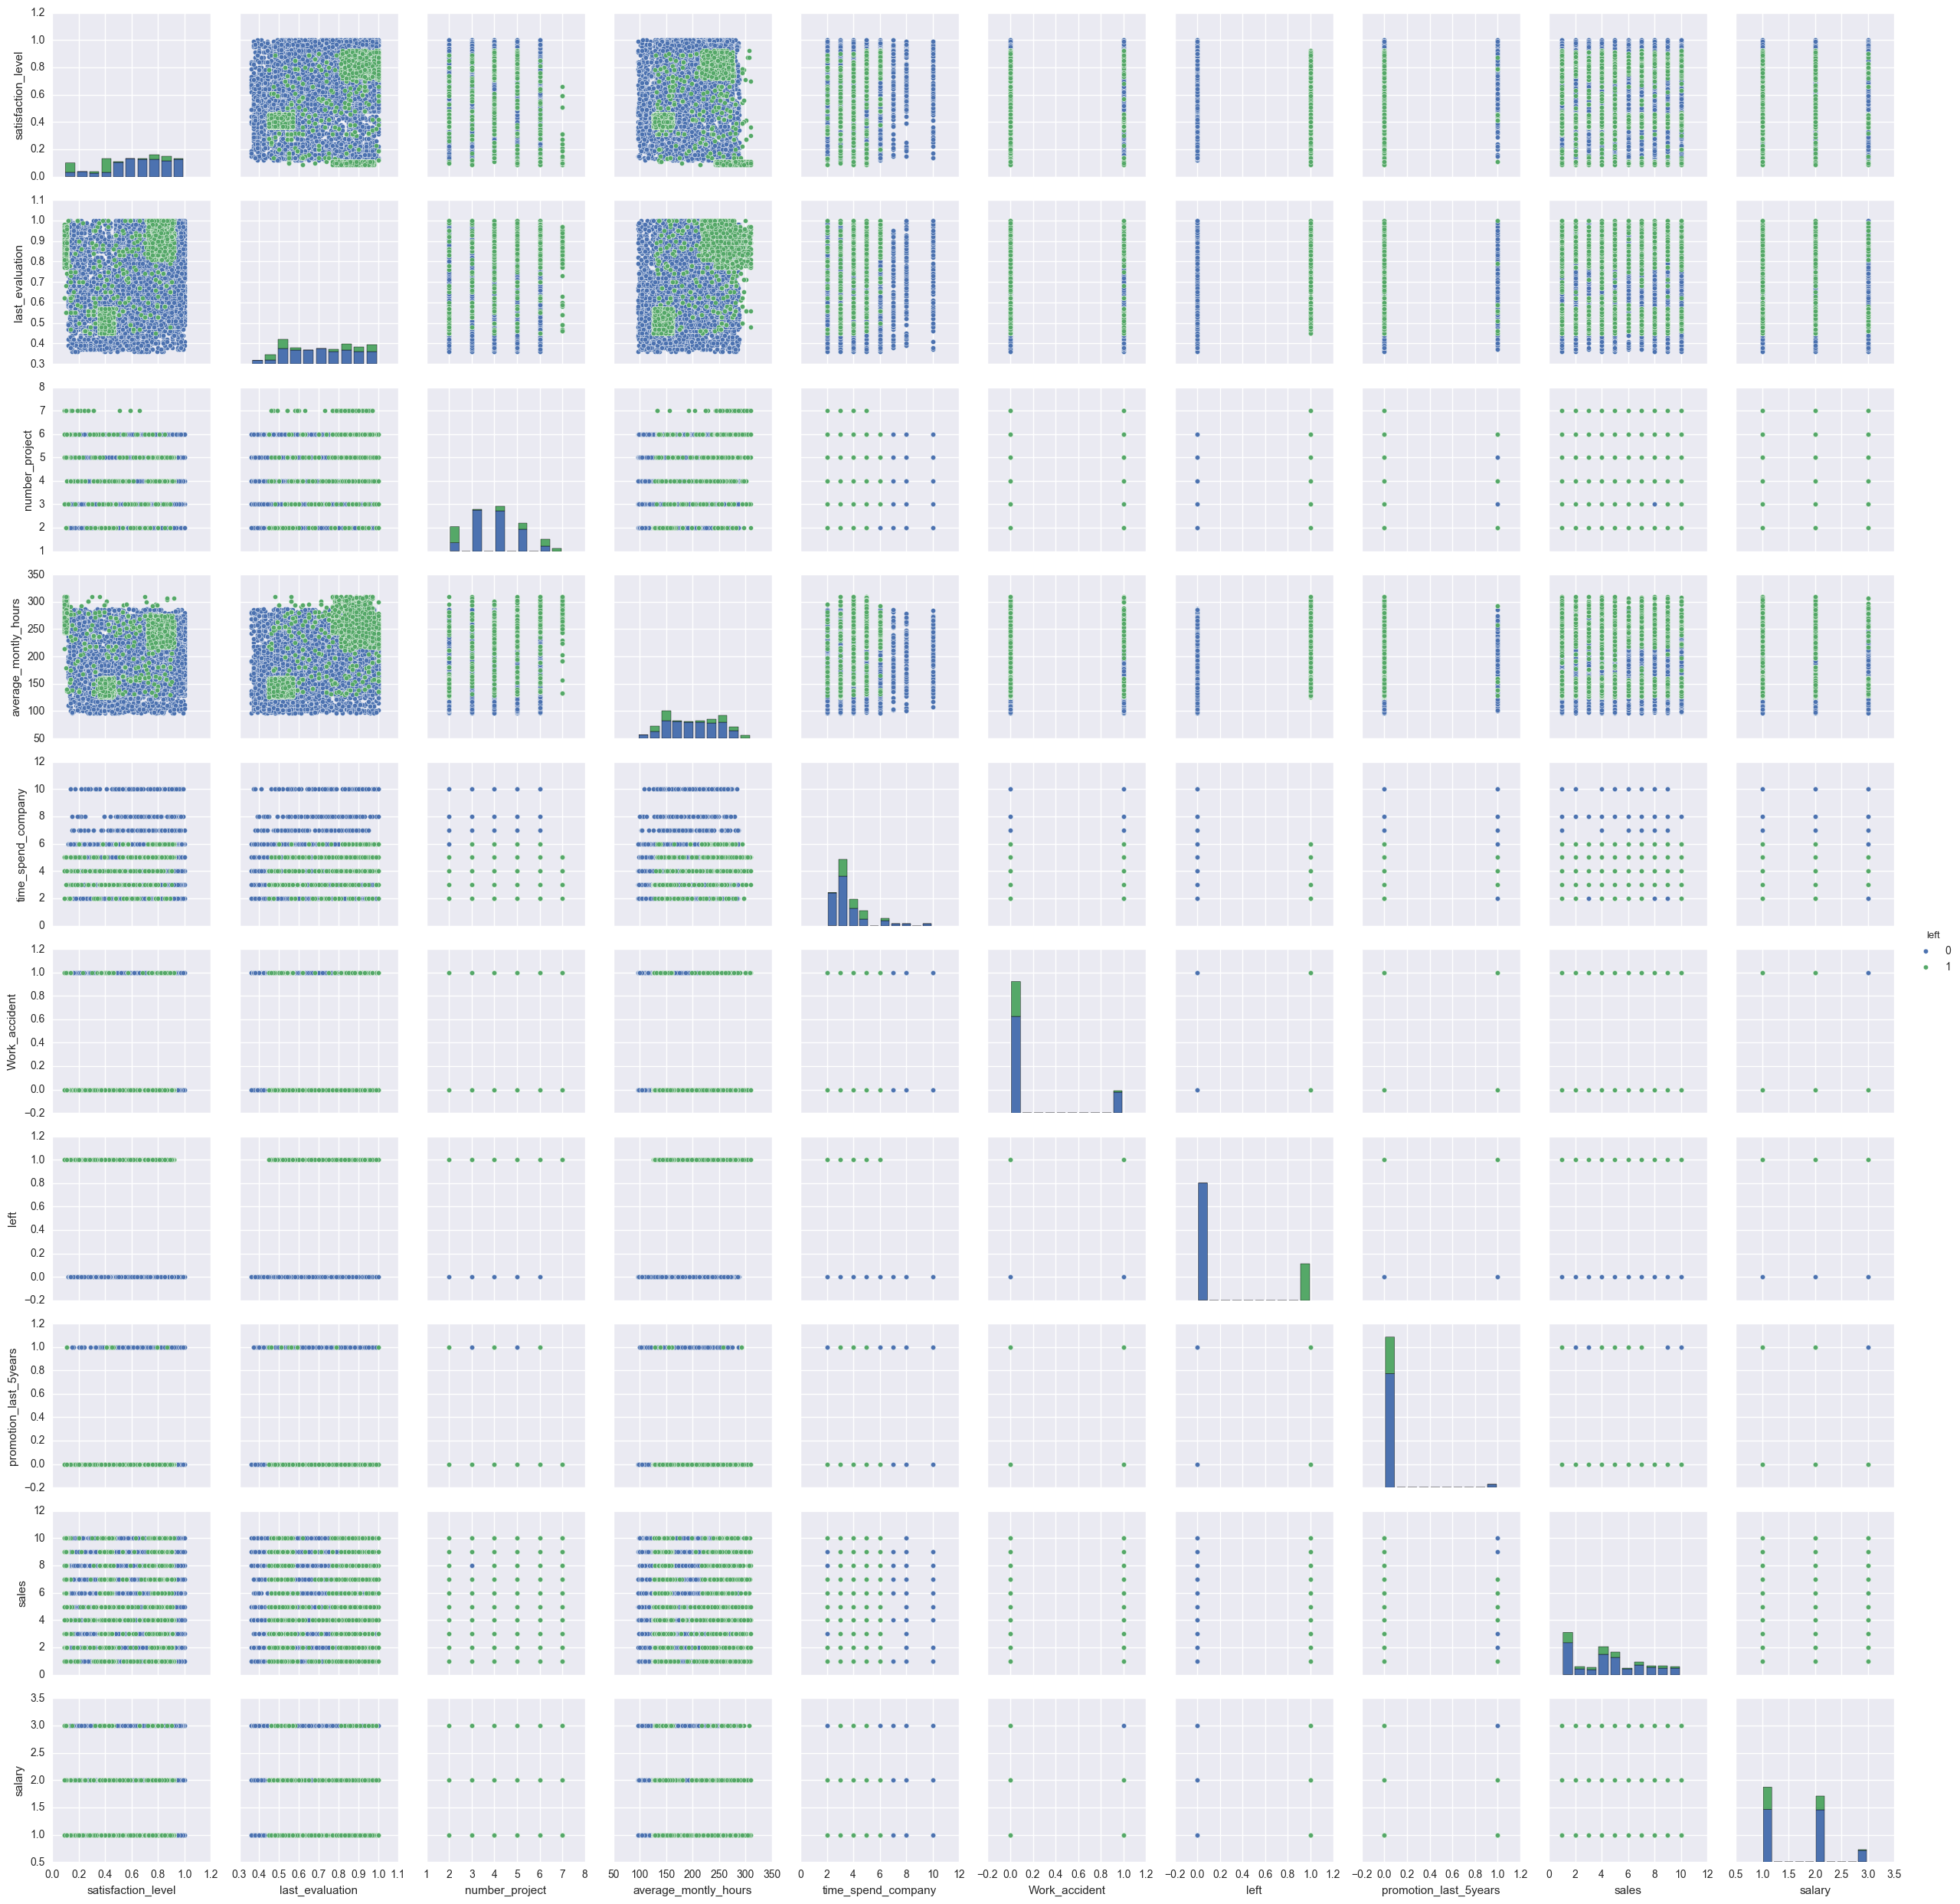

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb
sb.pairplot(employee_data_copy, hue='left')

From above plots, it looks like we can get good insights into the data using histogram plots. Let's have closer look at them

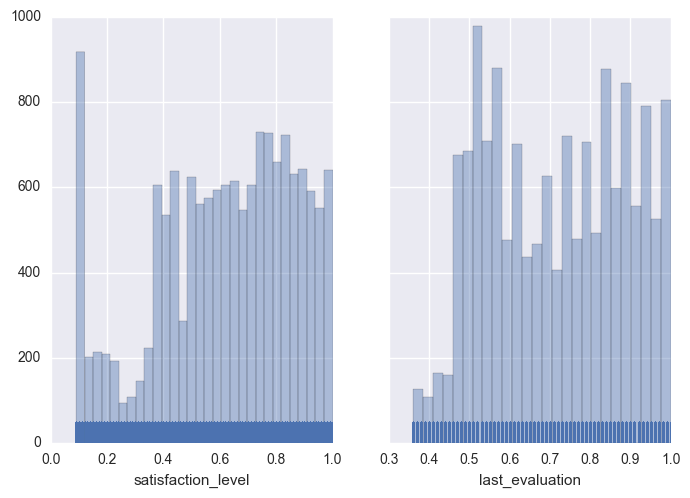

In [5]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sb.distplot(employee_data_copy['satisfaction_level'], kde=False, rug=True,ax=ax1)
sb.distplot(employee_data_copy['last_evaluation'], kde=False, rug=True,ax=ax2)

Above are histogram plots of the "*satisfaction_level*" and "*last_evaluation*". Both of the histogram are well spread across. This gives the hint that there can be a correlation between satisfaction_level abd last_evaluation.
Lets find it out using scatter plot

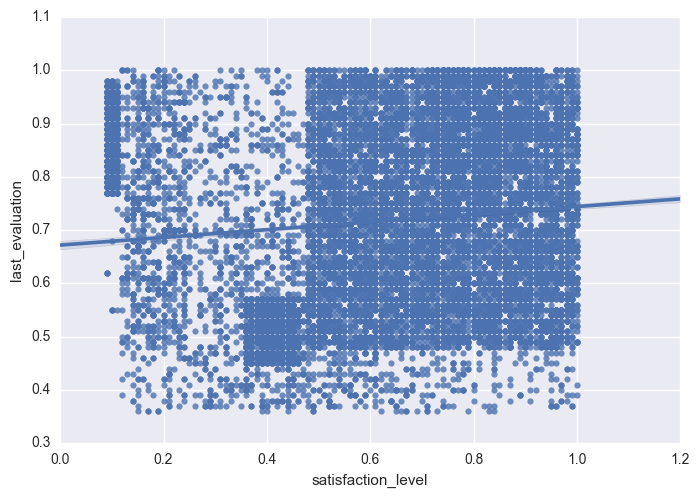

In [6]:
ax = sb.regplot(x="satisfaction_level", y="last_evaluation", data=employee_data_copy)


As can be seen above scatter plot does give indication about the correleation between last_evaluation and 'statisfaction_level'. The upper right corner of the scatter plot is very dense which suggests that 'satisfaction level' and 'last evaluation' are positively correlated. That is the higher last evaluation score has positive effect on satisfaction level.

## Analysis : 

The higher last evaluation score has positive effect on satisfaction level.

Below is the histogram of the "number of projects" per employee

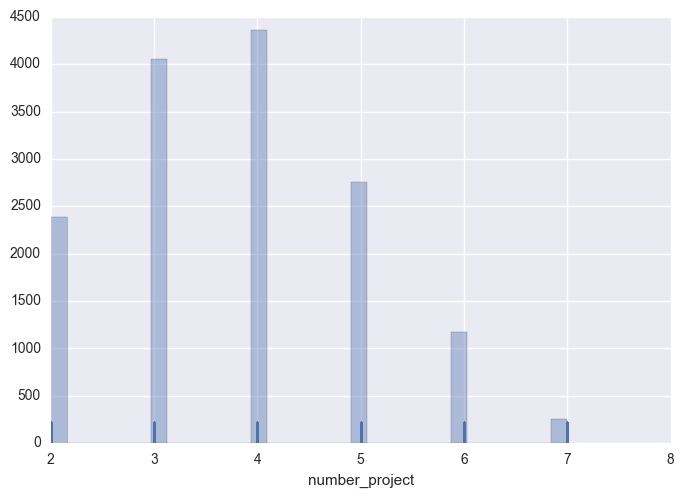

In [8]:
sb.distplot(employee_data_copy['number_project'], kde=False, rug=True)

## Analysis 2 : Heighest number of people are working on 4 projects at a time. 4 is middle of the max and min number of project which suggest that the project work is quite well distributed

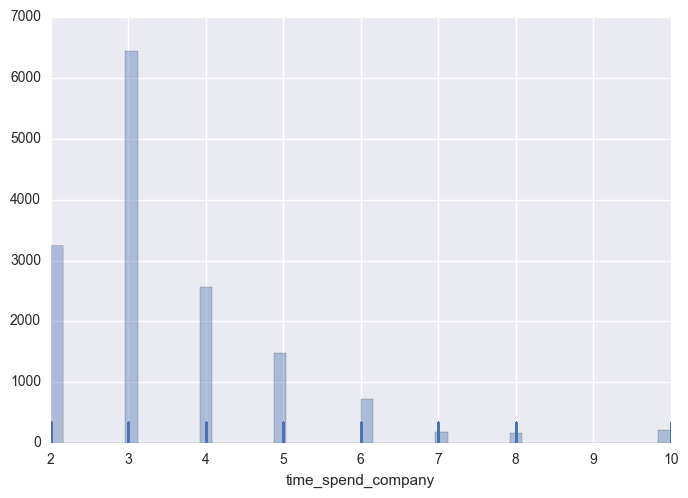

In [9]:
sb.distplot(employee_data_copy['time_spend_company'], kde=False, rug=True)


In [10]:
Morethanfive = employee_data_copy.loc[(employee_data_copy['time_spend_company']>5) & (employee_data_copy['left']==0)].size
Lessthanfive = employee_data_copy.loc[(employee_data_copy['time_spend_company']<=5) & (employee_data_copy['left']==0)].size
Total = employee_data_copy.loc[(employee_data_copy['left']==0)].size

print("Number of Current Employees working more than 5 years = " + str(Morethanfive))
print("Number of Current Employees  = " + str(Total))
print("Number of Current Employees working equal or less than 5 years = " + str(Lessthanfive))

print("Percentage of Employees working more than 5 years = " + str(100.0*Morethanfive/Total))
print("Percentage of Employees working less or equal to 5 years = " + str(100.0*Lessthanfive/Total))

Number of Current Employees working more than 5 years = 10730
Number of Current Employees  = 114280
Number of Current Employees working equal or less than 5 years = 103550
Percentage of Employees working more than 5 years = 9.38921946097
Percentage of Employees working less or equal to 5 years = 90.610780539


## Analysis - Whoping 90% of the working workforce has been with company for less than 5 years

Below is histogram of satisfaction_level of the employees which have not left company. The histogram shows that employees which have not left company are having higher satisfaction level

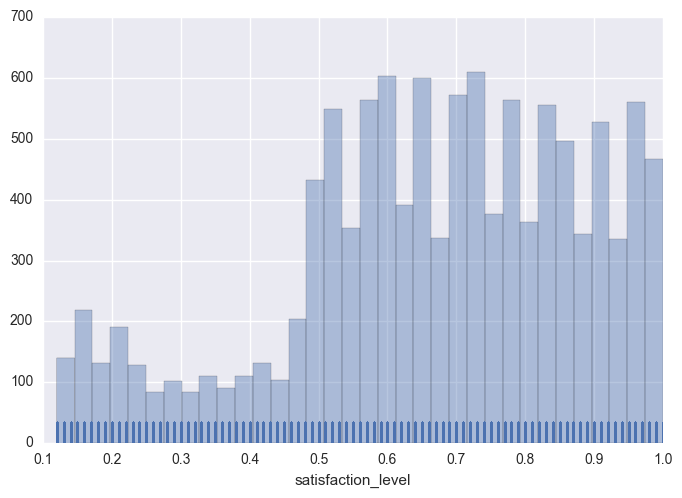

In [44]:
employee_left = employee_data_copy.loc[employee_data_copy['left']==1]
employee_not_left = employee_data_copy.loc[employee_data_copy['left']==0]
sb.distplot(employee_not_left['satisfaction_level'], kde=False, rug=True)

On the other hand below is the histogram of satisfaction level of the employees which have left company. Histogram shows the satisfaction level of such employees was on the lower side.

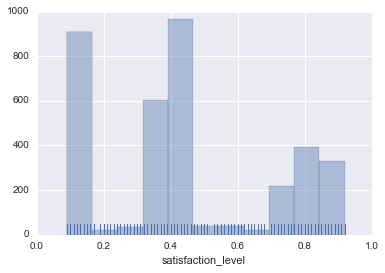

In [36]:

sb.distplot(employee_left['satisfaction_level'], kde=False, rug=True)

## Analysis 3 - 

quality of satisfaction_level is quite good indicator of tedency of the employee towards leaving the company

# Cheking Correlation of the data

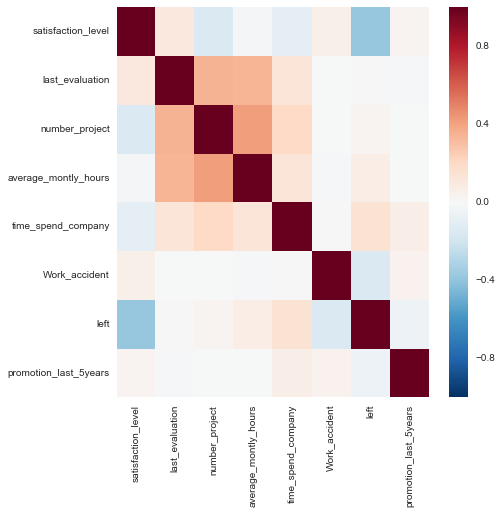

In [62]:
corrmat = employee_data.corr()
f, ax = plt.subplots(figsize=(7, 7))
# Draw the heatmap using seaborn
sb.heatmap(corrmat, square=False)
plt.show()

# Analysis - 

    1.As already suggested last_evaluation and satisfaction_level are correlated, which means higher score in last_evaluation resulting in better satisfaction level
    
    2.satisfaction_levels are inversely correlated to the employee leaving the company. Lower the satisfaction level , higher are the percentange of the employees leaving the company
    
    3.Number of projects and avarage monthly hours are correlated to the evaluation_score. Also number of projects and avarage_monthly_hours are related means more number of projects are resulting in more number of hours. So to summerize, More number of projects resulting in more monthly hours which is getting translated into getting higher evaluation_score
    
    4.There is also light corrleation between number of years employee worked before he left the company.
    
      

# Correlation by salaries

In [63]:
corrmat_low = employee_data[employee_data['salary'] == 'low'].corr()
corrmat_medium = employee_data[employee_data['salary'] == 'medium'].corr()
corrmat_high = employee_data[employee_data['salary'] == 'high'].corr()


## Correlation data matrix for low salaried employee

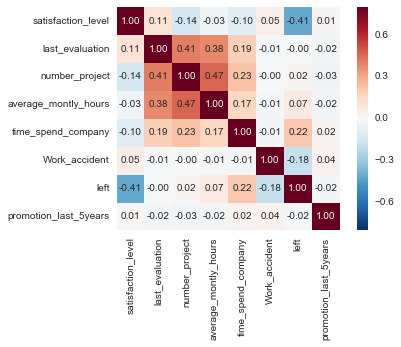

In [64]:
sb.heatmap(corrmat_low, vmax=.8, square=True,annot=True,fmt='.2f')

## Correlation data matrix for medium level salaried employee

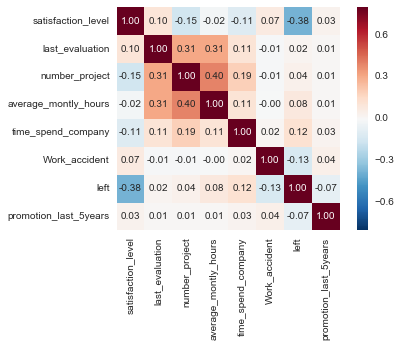

In [66]:
sb.heatmap(corrmat_medium, vmax=.8, square=True,annot=True,fmt='.2f')


## Correlation data matrix for high level salaried employee

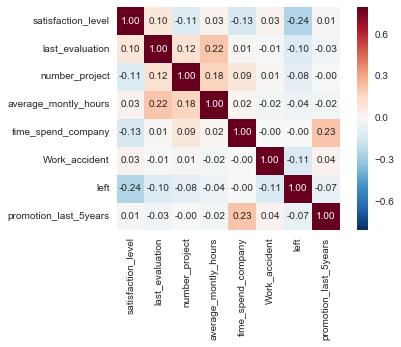

In [67]:
sb.heatmap(corrmat_high, vmax=.8, square=True,annot=True,fmt='.2f')



# Analysis - 

1. The data correleation remains relatively same for low and medium level salaried employee but changes for high salaried employee

2. The inverse correleation between satisfaction_level and employee leaving company is still present in high salaried employee but the its intensity has decreased. Means high salries have positive impact which reduce attrition rate even if employees are undatisfied.

3. On the other hand correlation between number of project leading to more number of hours leading to higher evaluation result decreases in high salaried employees.


In [73]:
df_low = employee_data[employee_data['salary'] == 'low']
df_medium = employee_data[employee_data['salary'] == 'medium']
df_high = employee_data[employee_data['salary'] == 'high']

fmt = '{:<22}{:<25}{}'

print(fmt.format('', 'mean', 'std'))
for i, (mean, std) in enumerate(zip(df_low.mean(), df_low.std())):
    print(fmt.format(df_low.columns[i], mean, std))
print('\n')
for i, (mean, std) in enumerate(zip(df_medium.mean(), df_medium.std())):
    print(fmt.format(df_low.columns[i], mean, std))
print('\n')
for i, (mean, std) in enumerate(zip(df_high.mean(), df_high.std())):
    print(fmt.format(df_low.columns[i], mean, std))

                      mean                     std
satisfaction_level    0.600753143794           0.254593761942
last_evaluation       0.717017495899           0.173260605518
number_project        3.79989065063            1.28182200684
average_montly_hours  200.996582832            50.8322142015
time_spend_company    3.43821760525            1.30381816692
Work_accident         0.142154182613           0.349232074281
left                  0.29688354292            0.45691601116
promotion_last_5years 0.00902132312739         0.0945577125059


satisfaction_level    0.621816630469           0.2450691159
last_evaluation       0.717322370462           0.17104288526
number_project        3.81352776916            1.2012316138
average_montly_hours  201.338349364            49.3441879497
time_spend_company    3.52901023891            1.50644207992
Work_accident         0.145361464474           0.352492247803
left                  0.204312752094           0.403229804806
promotion_last_5years 0.028

# Analysis 

    high salary employees spend more time in company but less monthly working hours than the others.
    high salary employees have been promoted more and have felt more satisfied.
    high salary employees tend to choose stay rather than left.
    high salary employees make a little bit more work accidents than the others.


# Most interesting part - Let's create prediction models

## *1. Prediction of employee left the company*

In [14]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
#import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [16]:
df_copy = pd.get_dummies(employee_data)
df_copy.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [22]:
df1 = df_copy
y = df1['left'].values
df1 = df1.drop(['left'],axis=1)
X = df1.values

[[ 0.38  0.53  2.   ...,  0.    1.    0.  ]
 [ 0.8   0.86  5.   ...,  0.    0.    1.  ]
 [ 0.11  0.88  7.   ...,  0.    0.    1.  ]
 ..., 
 [ 0.37  0.53  2.   ...,  0.    1.    0.  ]
 [ 0.11  0.96  6.   ...,  0.    1.    0.  ]
 [ 0.37  0.52  2.   ...,  0.    1.    0.  ]]


In [18]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.50)

In [32]:
log_reg = LogisticRegression()
log_reg.fit(Xtrain, ytrain)
y_val_l = log_reg.predict_proba(Xtest)
print(pd.DataFrame(y_val_l).idxmax(axis=1).values)
print("Validation accuracy: ", sum(pd.DataFrame(y_val_l).idxmax(axis=1).values
                                   == ytest)/len(ytest))

[0 0 0 ..., 0 1 0]
Validation accuracy:  0.791466666667


In [20]:
sdg = SGDClassifier()
sdg.fit(Xtrain, ytrain)
y_val_l = sdg.predict(Xtest)
print("Validation accuracy: ", sum(y_val_l
                                   == ytest)/len(ytest))

Validation accuracy:  0.766


In [21]:
radm = RandomForestClassifier()
radm.fit(Xtrain, ytrain)
y_val_l = radm.predict_proba(Xtest)
print("Validation accuracy: ", sum(pd.DataFrame(y_val_l).idxmax(axis=1).values
                                   == ytest)/len(ytest))

Validation accuracy:  0.9852


# Analysis - 

Random forest algorithm is has best prediction result accuracy of 98%. Random forest algorithm makes use of series of reasoning in its algorithm. It performs best may due to its similarity of Human reasoning process.

In [34]:
import numpy as np
indices = np.argsort(radm.feature_importances_)[::-1]

# Print the feature ranking
print('Feature ranking:')

for f in range(df1.shape[1]):
    print('%d. feature %d %s (%f)' % (f+1 , indices[f], df1.columns[indices[f]],
                                      radm.feature_importances_[indices[f]]))

Feature ranking:
1. feature 0 satisfaction_level (0.309674)
2. feature 4 time_spend_company (0.204284)
3. feature 2 number_project (0.155676)
4. feature 3 average_montly_hours (0.152077)
5. feature 1 last_evaluation (0.128518)
6. feature 5 Work_accident (0.011383)
7. feature 18 salary_low (0.006679)
8. feature 17 salary_high (0.005253)
9. feature 16 sales_technical (0.004320)
10. feature 19 salary_medium (0.003874)
11. feature 14 sales_sales (0.003541)
12. feature 15 sales_support (0.002520)
13. feature 11 sales_management (0.001840)
14. feature 7 sales_IT (0.001840)
15. feature 6 promotion_last_5years (0.001753)
16. feature 12 sales_marketing (0.001514)
17. feature 9 sales_accounting (0.001430)
18. feature 10 sales_hr (0.001412)
19. feature 8 sales_RandD (0.001251)
20. feature 13 sales_product_mng (0.001161)


# Analysis - 
Above is the list of the features stated in decreasing importance order. Above list shows primary factors of employee quiting job

    1, satisfaction_level
    2, time_spend_company
    3, number_project
    4, last_evaluation
    5, work_accident




# Let's predict who will quit job next

In [39]:
stay = employee_data[employee_data['left'] == 0]
stay_copy = pd.get_dummies(stay)
df1 = stay_copy
y = df1['left'].values
df1 = df1.drop(['left'],axis=1)
X = df1.values
radm.predict_proba(X)
sum(pred[:,1]==1)




3

# Analysis -
Total three employees will leave the job soon :)


Final Note - So we have shown in this notebook, that using this data some good insights into the employee attrition can be derived. Using this dataset, we also developed predictive model which has accuracy of 98% in predicting which employee will quit job using all other parameters.